I **fatima Hassan** confirm - by submitting this document that the solutions in this notebook are a result of my own work and that i abide by the EDSA honour code 

# Importing Packages

In [577]:
# import our libraries
import nltk
from nltk.tokenize import TreebankWordTokenizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import warnings
warnings.filterwarnings("ignore")
# set plot style
sns.set(style='whitegrid')

# Loading The Data 

In [578]:
# import our datasets
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [579]:
#load the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

# EDA

In [580]:
# view our train data
train_df.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


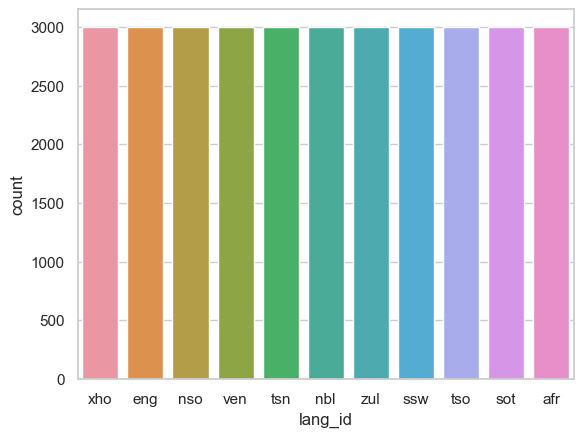

In [581]:
# view the distribution of text in our dataset
sns.countplot(data=train_df, x='lang_id');

In [582]:
# view a description of our dataset
train_df.describe(include='all')

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [583]:
# droping rows with duplicate text
train_drop = train_df.drop_duplicates(subset='text')
train_drop.shape

(29948, 2)

In [584]:
# view a description of our dataset
train_drop.describe(include='all')

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


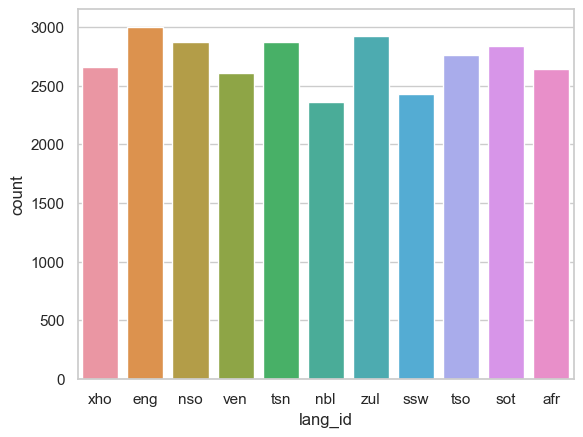

In [585]:
# viewing the distribution of text in the different Languages in our new dataset
sns.countplot(data=train_drop, x='lang_id');

In [586]:
# view a description of our dataset
train_drop.describe(include='all')

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


In [587]:
# view the number of text per language
train_drop['lang_id'].value_counts()

lang_id
eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: count, dtype: int64

In [588]:
# store a sample text in a variable to test our cleaning techniques
sample = train_drop['text'].sample().tolist()[0]
sample

'matheriale wa tlholego ya phologolo o ka amogelwa fela mo lefelong le le seng phepa la polante e e opafadiwang mme ga go matheriale o o jalo o o tla tlosiwang go tswa lefelong le ntle le ka ditiro tsa sedirisiwa sa opafatso'

In [589]:
# using regex to remove unncessary text, links and symbols from our data
## preprocessing the sample text
# remove hashtag(#) from tweet
sample2 = re.sub('#','',sample)
# remove oldstyle 'RT' from our text
sample2 = re.sub(r'^RT[\s]+','',sample2)
# remove hyperlink
sample2 = re.sub(r'https?://[^s\n\r]+','',sample2)
# Remove "��"
sample2 = re.sub("��", "", sample2)
# Remove text starting with "@"
sample2 = re.sub(r"@\w+\s?", "", sample2)
print(sample2)

matheriale wa tlholego ya phologolo o ka amogelwa fela mo lefelong le le seng phepa la polante e e opafadiwang mme ga go matheriale o o jalo o o tla tlosiwang go tswa lefelong le ntle le ka ditiro tsa sedirisiwa sa opafatso


In [590]:
# convert our text to lower case
sample2 = sample2.lower()
sample2

'matheriale wa tlholego ya phologolo o ka amogelwa fela mo lefelong le le seng phepa la polante e e opafadiwang mme ga go matheriale o o jalo o o tla tlosiwang go tswa lefelong le ntle le ka ditiro tsa sedirisiwa sa opafatso'

In [591]:
# remove punctuations
punctuations = string.punctuation
sample2 = ''.join([word for word in sample2 if word not in punctuations])
sample2

'matheriale wa tlholego ya phologolo o ka amogelwa fela mo lefelong le le seng phepa la polante e e opafadiwang mme ga go matheriale o o jalo o o tla tlosiwang go tswa lefelong le ntle le ka ditiro tsa sedirisiwa sa opafatso'

In [592]:
# tokenize our sample
tokenizer = TreebankWordTokenizer()
sample2 = tokenizer.tokenize(sample2)
sample2

['matheriale',
 'wa',
 'tlholego',
 'ya',
 'phologolo',
 'o',
 'ka',
 'amogelwa',
 'fela',
 'mo',
 'lefelong',
 'le',
 'le',
 'seng',
 'phepa',
 'la',
 'polante',
 'e',
 'e',
 'opafadiwang',
 'mme',
 'ga',
 'go',
 'matheriale',
 'o',
 'o',
 'jalo',
 'o',
 'o',
 'tla',
 'tlosiwang',
 'go',
 'tswa',
 'lefelong',
 'le',
 'ntle',
 'le',
 'ka',
 'ditiro',
 'tsa',
 'sedirisiwa',
 'sa',
 'opafatso']

In [593]:
# remove stop words from our sample
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [594]:
# remove stop words from our sample
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [595]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')

sample2 = [word for word in sample2 if word not in stopwords_english]
print(sample2)

['matheriale', 'wa', 'tlholego', 'ya', 'phologolo', 'ka', 'amogelwa', 'fela', 'mo', 'lefelong', 'le', 'le', 'seng', 'phepa', 'la', 'polante', 'e', 'e', 'opafadiwang', 'mme', 'ga', 'go', 'matheriale', 'jalo', 'tla', 'tlosiwang', 'go', 'tswa', 'lefelong', 'le', 'ntle', 'le', 'ka', 'ditiro', 'tsa', 'sedirisiwa', 'sa', 'opafatso']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [596]:
# stem our sample data
# Initialize WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lem_sample = []

for word in sample2:
    lem_sample.append(lemmatizer.lemmatize(word))
lem_sample

[nltk_data] Downloading package wordnet to /Users/fatima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['matheriale',
 'wa',
 'tlholego',
 'ya',
 'phologolo',
 'ka',
 'amogelwa',
 'fela',
 'mo',
 'lefelong',
 'le',
 'le',
 'seng',
 'phepa',
 'la',
 'polante',
 'e',
 'e',
 'opafadiwang',
 'mme',
 'ga',
 'go',
 'matheriale',
 'jalo',
 'tla',
 'tlosiwang',
 'go',
 'tswa',
 'lefelong',
 'le',
 'ntle',
 'le',
 'ka',
 'ditiro',
 'tsa',
 'sedirisiwa',
 'sa',
 'opafatso']

In [597]:
# define a function to handle the preprocessing
def preprocess(message):
    import string
    import nltk
    import re
    from nltk.tokenize import TreebankWordTokenizer
    from nltk.stem import WordNetLemmatizer
    punctuations = string.punctuation
    from nltk.corpus import stopwords
    stopwords_english = stopwords.words('english')
    # remove hashtag(#) from text
    message = re.sub('#','',message)
    # remove oldstyle from text
    message = re.sub(r'^RT[\s]+','',message)
    # remove hyperlink
    message = re.sub(r'https?://[^s\n\r]+','',message)
    # Remove "��"
    message = re.sub("��", "",message)
    # Remove text starting with "@"
    message = re.sub(r"@\w+\s?", "", message)
    # Remove newline followed by any character/digit
    message = re.sub(r"\n.", "", message)
    # convert our text to lower case
    message = message.lower()
    # remove punctuations
    message = ''.join([word for word in message if word not in punctuations])
    # tokenize
    tokenizer = TreebankWordTokenizer()
    message = tokenizer.tokenize(message)
    # remove stop words
    message = [word for word in message if word not in stopwords_english]

    # lemmatize text
    lemmatizer = WordNetLemmatizer()
    lem_message = []

    for word in message:
        lem_message.append(lemmatizer.lemmatize(word))

    return lem_message

In [598]:
# test our function
sample2 = train_drop['text'].sample().tolist()[0]
preprocess(sample2)

['lefelo',
 'le',
 'fe',
 'goba',
 'le',
 'fe',
 'ka',
 'go',
 'porofense',
 'leo',
 'le',
 'direlwago',
 'ke',
 'sehlopha',
 'mo',
 'letšatsing',
 'la',
 'tsenyotirišong',
 'ya',
 'karolo',
 'ye',
 'go',
 'ya',
 'ka',
 'dikarolo',
 'tša',
 'goba',
 'tša',
 'otinense',
 'ya',
 'ya',
 'ditsela',
 'otinense',
 'ya',
 'le',
 'lokollwa',
 'go',
 'tirelo',
 'yeo',
 'le',
 'kgolagano',
 'go',
 'tirelo',
 'ye',
 'ka',
 'go',
 'thaetleletiti',
 'yeo',
 'e',
 'tla',
 'tšewago',
 'gore',
 'e',
 'fedišitšwe']

In [599]:
# add a new column to our database containing preprocessed text
train_drop.loc[:,'preprocessed'] = train_drop['text'].apply(preprocess)

In [600]:
train_drop.head()

,lang_id,text,preprocessed
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


# Feature Engineering 

In [601]:
# Import pandas library
import pandas as pd

# Create a sample DataFrame
data = {
    'lang_id': ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
}
train_df = pd.read_csv('train_set.csv')

# Define a dictionary mapping language abbreviations to indices
language_indices = {
    'xho': 1,
    'eng': 2,
    'nso': 3,
    'ven': 4,
    'tsn': 5,
    'nbl': 6,
    'zul': 7,
    'ssw': 8,
    'tso': 9,
    'sot': 10,
    'afr': 11
}

# Create a new column 'index' based on 'lang_id'
train_df['index'] = train_df['lang_id'].map(language_indices) 

# Print the resulting DataFrame
print(train_df)


      lang_id                                               text  index
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...      1
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...      1
2         eng  the province of kwazulu-natal department of tr...      2
3         nso  o netefatša gore o ba file dilo ka moka tše le...      3
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...      4
...       ...                                                ...    ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...      5
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...     10
32997     eng  closing date for the submission of completed t...      2
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...      1
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...     10

[33000 rows x 3 columns]


In [602]:
train_df

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,1
2,eng,the province of kwazulu-natal department of tr...,2
3,nso,o netefatša gore o ba file dilo ka moka tše le...,3
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,4
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,5
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,10
32997,eng,closing date for the submission of completed t...,2
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,1


In [603]:
copy_train_df = train_df
copy_train_df.head()

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,1
2,eng,the province of kwazulu-natal department of tr...,2
3,nso,o netefatša gore o ba file dilo ka moka tše le...,3
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,4


In [604]:
# Import pandas library
import pandas as pd

# Load your existing DataFrame (replace <your_data> with your actual DataFrame)
train_df = pd.read_csv('train_set.csv')


# Get the column names
columns = train_df.columns

# Print the column names
print(columns)


Index(['lang_id', 'text'], dtype='object')


In [605]:
 train_drop.head()

,lang_id,text,preprocessed
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [606]:
# encoding our text data
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1,2))
X_count = vectorizer.fit_transform(train_drop['preprocessed'].apply(lambda x: ' '.join(x)).values.astype(str))

In [607]:
# convert our predictors to an array
X = X_count.toarray()

In [608]:
# vectorize with a limited number of features
vectorizer_max = TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1,2), max_features=700)
X_count_max = vectorizer_max.fit_transform(train_drop['preprocessed'].apply(lambda x: ' '.join(x)).values.astype(str))

In [609]:
# convert our predictors to an array
X_max = X_count_max.toarray()

In [610]:
# create an array for our target variable
y = train_drop['lang_id']

In [611]:
# view our imbalanced target variable
y.value_counts()

lang_id
eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: count, dtype: int64

In [612]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from comet_ml import Experiment
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger("comet_ml").setLevel(logging.CRITICAL)

# Making predictions on test data 

In [613]:
# View test data
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [616]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
vectorizer = CountVectorizer()




In [617]:
#select the feature and the target variable
X = train_df['text']
y = train_df['lang_id']

In [618]:
#instantiation of labelEncoder
le = LabelEncoder()

In [619]:
#transform the target variable to numbers
y = le.fit_transform(y)

In [620]:
#using countVectoerizer
vectorizer = CountVectorizer()

In [621]:
#transforming the feature variable
X_count = vectorizer.fit_transform(X)

In [622]:
#shape of the feature after applying the countvectorizer
X_count.shape

(33000, 141958)

In [623]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.25, random_state=0)

In [624]:
# View test data
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [625]:
X_test.shape

(8250, 141958)

# MODELLING 

In [626]:
#modeling 
clf = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
naive_bayes = MultinomialNB()

In [627]:
#fitting the model
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [628]:
#apply prediction to the model
y_pred = clf.predict(X_test)
y_knn = knn.predict(X_test)
y_nv = naive_bayes.predict(X_test)

# MODEL PERFOMANCE 

In [629]:
# View test data
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [630]:
#f1_score for the knn model
f1_knn = f1_score(y_test, y_knn, average = 'weighted')
print("The f1_score of the knn model is: {}".format(f1_knn))
#f1_score for RandomForestClassifier model
f1_clf = f1_score(y_test, y_pred, average = 'weighted')
print("The f1_score of the forest model is: {}".format(f1_clf))
#f1_score for the naive model
f1_naive = f1_score(y_test, y_nv, average = 'weighted')
print("The f1_score of the naive model is: {}".format(f1_naive))

The f1_score of the knn model is: 0.9233981659859274
The f1_score of the forest model is: 0.9865861157986
The f1_score of the naive model is: 0.9992730020680997


In [631]:
performance = pd.DataFrame([f1_knn, f1_clf, f1_naive], columns=['F1_Scores'])
performance.head()

,F1_Scores
0,0.923398
1,0.986586
2,0.999273


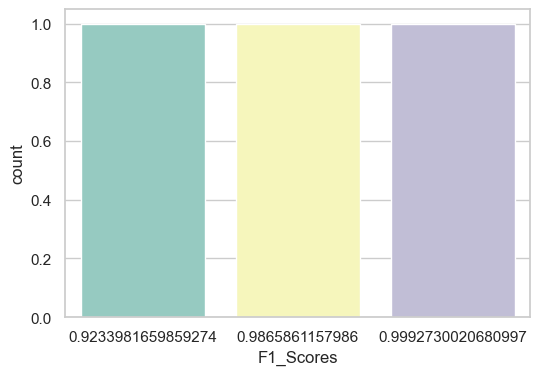

In [632]:
#using seaborn's countplot function
fig, axis = plt.subplots(figsize=(6, 4))
axis = sns.countplot(x='F1_Scores', data=performance, palette="Set3")
plt.show()

In [633]:
#making predictions
prediction = naive_bayes.predict(X_test)

In [634]:
#transforming the prediction from numbers to word
prediction = le.inverse_transform(prediction)
prediction

array(['sot', 'sot', 'sot', ..., 'afr', 'tsn', 'zul'], dtype=object)

In [635]:
submission = pd.DataFrame(list(zip(test_df['index'], prediction)), columns=['index', 'lang_id'])
submission

,index,lang_id
0,1,sot
1,2,sot
2,3,sot
3,4,sot
4,5,tsn
...,...,...
5677,5678,tsn
5678,5679,eng
5679,5680,tso
5680,5681,sot


In [636]:
#submission.index.name = 'newhead'
#submission.reset_index(inplace=False)
#submission

In [637]:
new_submission = submission[['index','lang_id']].copy()
new_submission

,index,lang_id
0,1,sot
1,2,sot
2,3,sot
3,4,sot
4,5,tsn
...,...,...
5677,5678,tsn
5678,5679,eng
5679,5680,tso
5680,5681,sot


In [638]:
submission.head()

,index,lang_id
0,1,sot
1,2,sot
2,3,sot
3,4,sot
4,5,tsn


In [639]:
prediction = submission[['index', 'lang_id']].copy()
prediction

,index,lang_id
0,1,sot
1,2,sot
2,3,sot
3,4,sot
4,5,tsn
...,...,...
5677,5678,tsn
5678,5679,eng
5679,5680,tso
5680,5681,sot


In [641]:
submission.to_csv("submission12.csv")